Ilkka

In [33]:
import numpy as np
import pandas as pd
from numpy.ma.core import array
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.ma.extras import unique

from ucimlrepo import fetch_ucirepo

Ilkka

In [34]:
chronic_kidney_disease = fetch_ucirepo(id=336) 
data = chronic_kidney_disease.data.original

data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Ilkka

In [35]:
data.drop(columns=['pcc', 'ba','pc', 'rbc', 'sc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], inplace = True)


Ilkka

In [36]:
data.rename(columns={'bp': 'blood pressure', 'sg': 'specific gravity', 'al': 'albumin', 'su': 'sugar', 'bgr':'blood glucose random', 'bu':'blood urea', 'sod': 'sodium', 'pot':'potassium', 'hemo':'hemoglobin', 'pcv': 'packed cell volume', 'wbcc': 'white blood cell count', 'rbcc': 'reb blood cell count'}, inplace = True)
data

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,reb blood cell count,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,NaN,NaN,15.4,44.0,7800.0,5.2,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,NaN,NaN,11.3,38.0,6000.0,NaN,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,NaN,NaN,9.6,31.0,7500.0,NaN,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,111.0,2.5,11.2,32.0,6700.0,3.9,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,NaN,NaN,11.6,35.0,7300.0,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,150.0,4.9,15.7,47.0,6700.0,4.9,notckd
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,141.0,3.5,16.5,54.0,7800.0,6.2,notckd
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,137.0,4.4,15.8,49.0,6600.0,5.4,notckd
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,135.0,4.9,14.2,51.0,7200.0,5.9,notckd


- We select all hemoglobin values from our dataframe and divide by 10 to convert from g/dl to g/l.

In [37]:
data['hemoglobin'] = data['hemoglobin'] / 10.0

- Using Pandas loc indexer, we can access rows and columns. We then search for row "class" and replace values that match our specific needs.

- Values "ckd", "ckd\t" will be replaced with "a".
- Values "notckd" will be replaced with "c".

- Unique() returns unique values from our row. Used for testing.



In [38]:
data.loc[data['class'] == 'ckd', 'class'] = 'a'
data.loc[data['class'] == 'ckd\t', 'class'] = 'a'


data.loc[data['class'] == 'notckd', 'class'] = 'c'

data['class'].unique()

<StringArray>
['a', 'c']
Length: 2, dtype: str

- For removing all rows which showcase too many null values, in this case 3 or more, we use .isnull() (Checking for null values) with .sum(axis=1) (Selecting the correct axis and getting sum) to get the number of null values per row and comparing if the row has less than 3 null values.
- Then we redetermine the dataframe "data" with all the rows that do not include more than 2 null values.

In [39]:
data = data[data.isnull().sum(axis=1) < 3]

- To create two new dataframes for affected data and for control data, we can filter the original dataframe based on the 'class' column.
- We created two new variables, affecteddata and controldata to hold these filtered dataframes.

In [40]:
affecteddata = data[data['class'] == 'a']
controldata = data[data['class'] == 'c']

- Next we doublecheck that both dataframes include only the relevant rows by checking the unique values in the 'class' column.
- We also wanna know how many rows are in each dataframe, so we print that value too

In [41]:
# compute and store values in variables
ad_unique_count = len(affecteddata['class'].unique().astype(str))
ad_row_count = len(affecteddata)

cd_unique_count = len(controldata['class'].unique().astype(str))
cd_row_count = len(controldata)

# print using the variables
print("The amount of unique values in affecteddata table: " + str(ad_unique_count))
print("The amount of rows in affecteddata table: " + str(ad_row_count))
print("")
print("The amount of unique values in controldata table: " + str(cd_unique_count))
print("The amount of rows in controldata table: " + str(cd_row_count))


The amount of unique values in affecteddata table: 1
The amount of rows in affecteddata table: 126

The amount of unique values in controldata table: 1
The amount of rows in controldata table: 139


- To calculate basic statistics for each dataframe, we can use the describe() method from pandas library.
- Listed under are tables showing the basic statistics for the data table and both affecteddata and controldata dataframes.

In [42]:
data.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,reb blood cell count
count,262.000000,262.000000,264.000000,265.000000,265.000000,255.000000,260.000000,244.000000,244.000000,262.000000,263.000000,249.000000,244.000000
mean,51.503817,75.801527,1.018258,0.879245,0.384906,142.121569,55.732692,138.192623,4.519672,1.301985,39.684411,8498.795181,4.759426
std,16.098773,13.359411,0.005734,1.354196,1.023844,75.155305,48.858818,7.383093,2.832182,0.288290,8.985741,2966.513131,0.998864
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,0.310000,9.000000,2600.000000,2.100000
25%,41.250000,70.000000,1.015000,0.000000,0.000000,98.500000,26.750000,135.000000,3.800000,1.090000,33.000000,6600.000000,4.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,118.000000,41.000000,139.000000,4.400000,1.360000,41.000000,8100.000000,4.800000
75%,63.000000,80.000000,1.025000,2.000000,0.000000,144.000000,57.250000,142.000000,4.900000,1.520000,46.500000,9800.000000,5.500000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,150.000000,47.000000,1.780000,54.000000,26400.000000,8.000000


In [43]:
affecteddata.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,reb blood cell count
count,123.000000,125.000000,125.000000,126.000000,126.000000,120.000000,125.000000,108.000000,108.000000,125.000000,125.000000,113.000000,108.000000
mean,57.081301,80.720000,1.013560,1.849206,0.809524,181.200000,80.420000,133.731481,4.751852,1.064320,32.440000,9450.442478,3.976852
std,14.465104,15.769305,0.004527,1.437038,1.366539,93.549394,60.501346,7.666661,4.203592,0.218965,7.150908,3720.458015,0.844510
min,6.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,104.000000,2.500000,0.310000,9.000000,2600.000000,2.100000
25%,49.500000,70.000000,1.010000,0.250000,0.000000,107.000000,37.000000,131.750000,3.800000,0.950000,29.000000,7100.000000,3.400000
50%,60.000000,80.000000,1.015000,2.000000,0.000000,158.000000,60.000000,136.000000,4.200000,1.080000,33.000000,9200.000000,3.900000
75%,65.000000,90.000000,1.015000,3.000000,1.000000,241.250000,107.000000,139.000000,4.900000,1.200000,37.000000,11000.000000,4.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,322.000000,145.000000,47.000000,1.610000,52.000000,26400.000000,8.000000


In [44]:
controldata.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,reb blood cell count
count,139.000000,137.000000,139.000000,139.0,139.0,135.000000,135.000000,136.000000,136.000000,137.000000,138.000000,136.000000,136.000000
mean,46.568345,71.313869,1.022482,0.0,0.0,107.385185,32.874074,141.735294,4.335294,1.518832,46.246377,7708.088235,5.380882
std,15.903719,8.559267,0.002509,0.0,0.0,18.747730,11.482257,4.792332,0.596351,0.128453,4.107695,1815.164727,0.592986
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,1.300000,40.000000,4300.000000,4.500000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.000000,23.500000,138.000000,3.700000,1.410000,43.000000,6300.000000,4.900000
50%,46.000000,70.000000,1.020000,0.0,0.0,107.000000,33.000000,141.000000,4.500000,1.500000,46.000000,7450.000000,5.300000
75%,58.000000,80.000000,1.025000,0.0,0.0,123.500000,44.000000,146.000000,4.900000,1.620000,50.000000,9225.000000,5.900000
max,80.000000,80.000000,1.025000,0.0,0.0,140.000000,50.000000,150.000000,5.000000,1.780000,54.000000,11000.000000,6.500000


- To visualize the distribution of numerical values in each dataframe, we can use histograms with seaborn library.
- We first select only the numeric columns from each dataframe using the select_dtypes() method.
- Then we create a dictionary to hold the dataframes for easy iteration.
- Finally, we loop through each numeric column and create histograms for each dataframe using seaborn.
- In this implementation, we assume every dataframe has the same numeric columns.

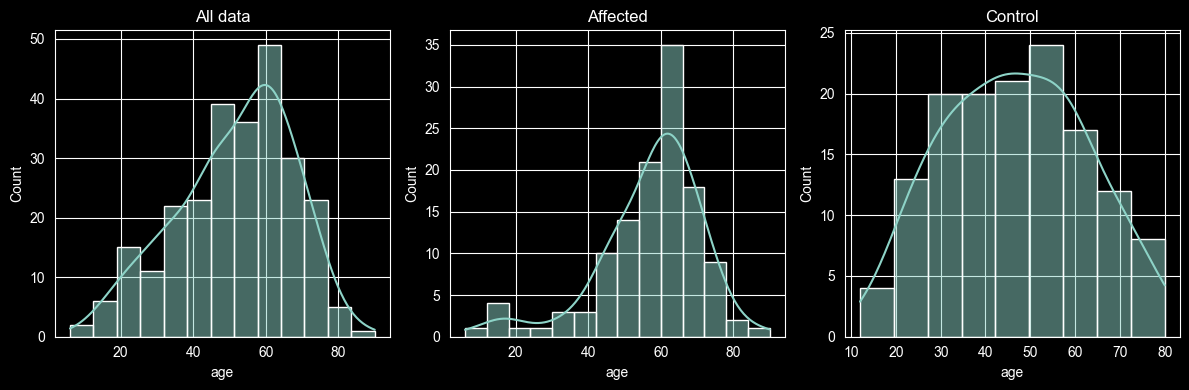

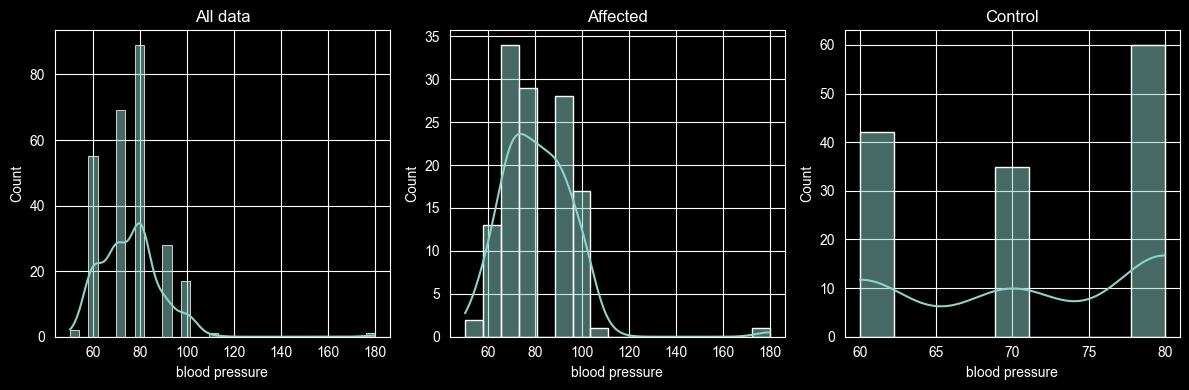

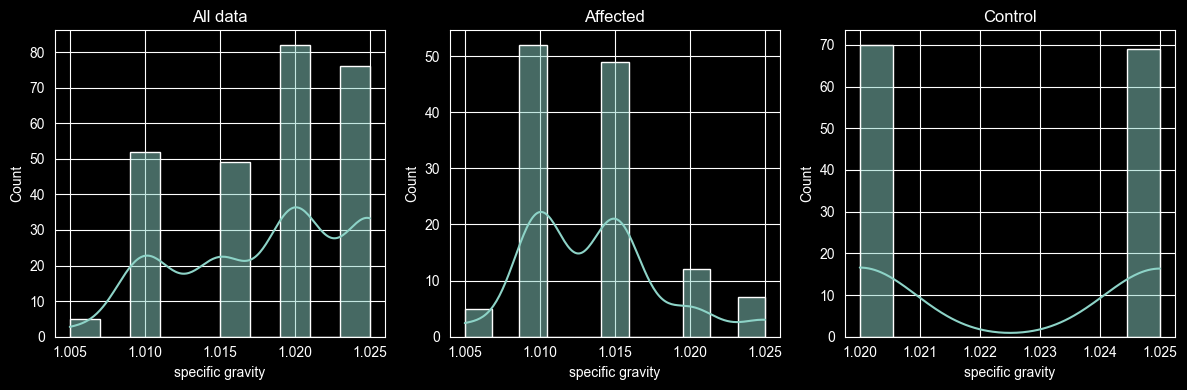

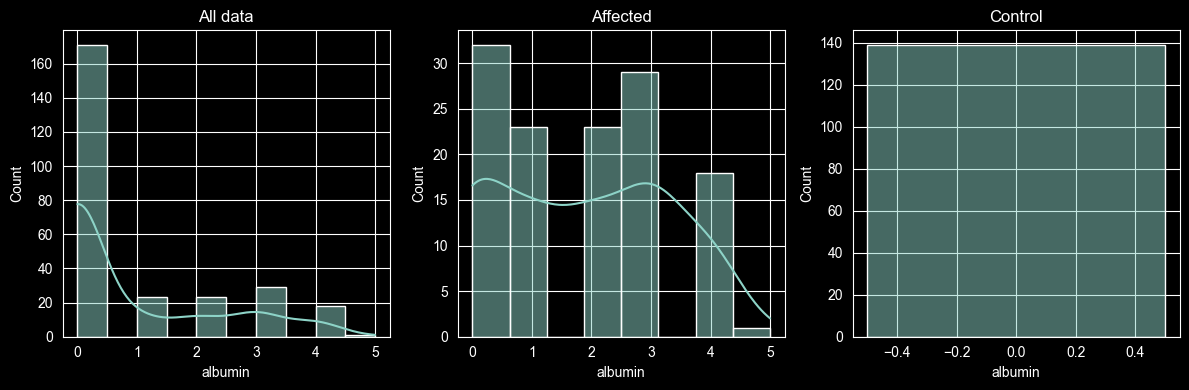

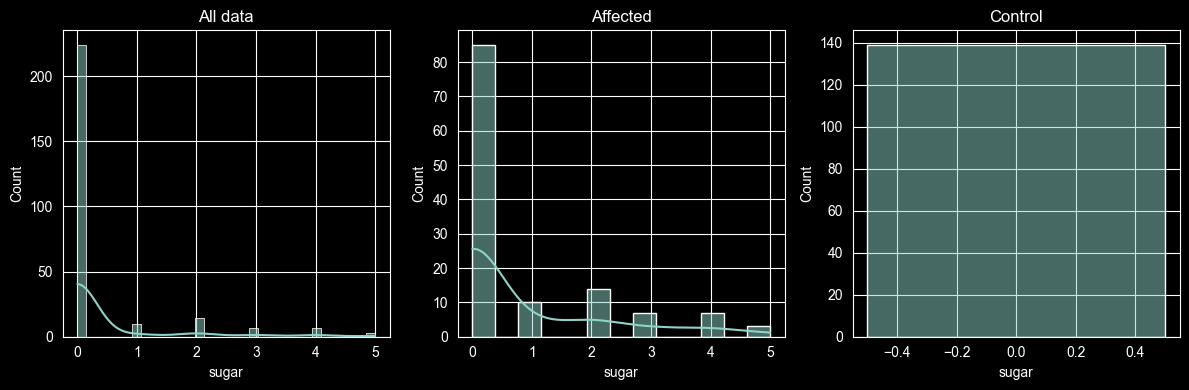

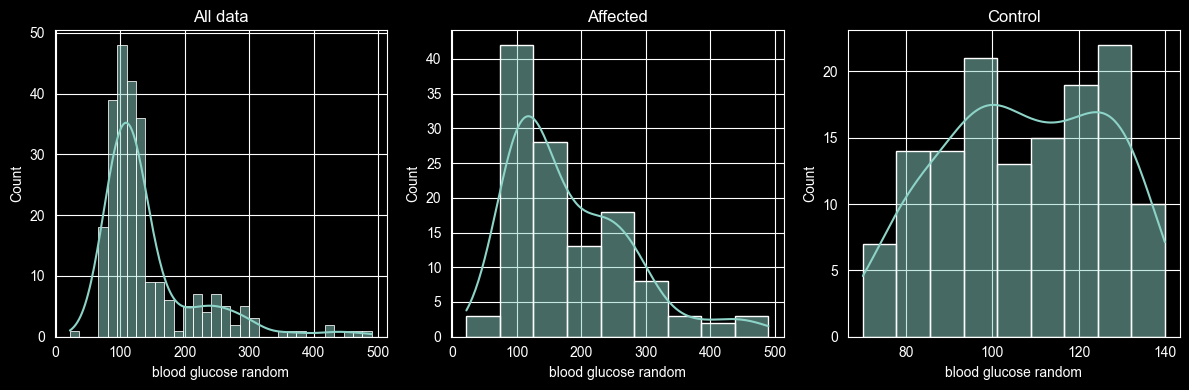

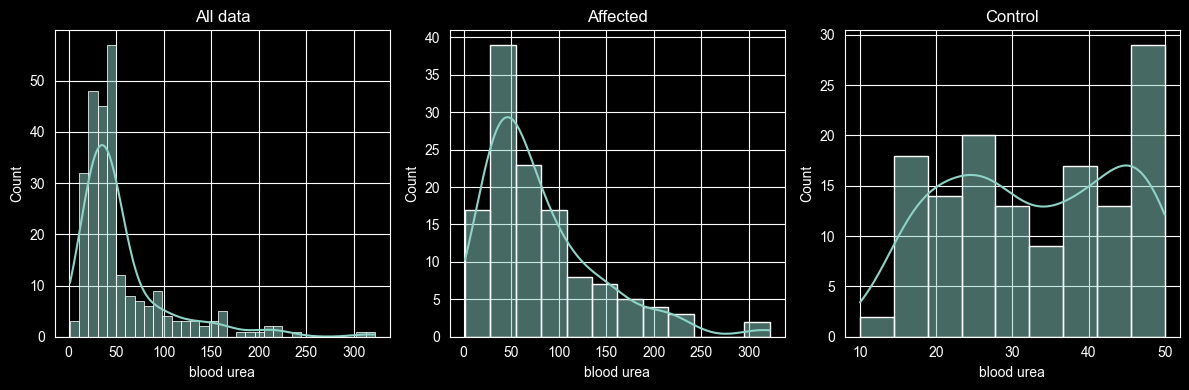

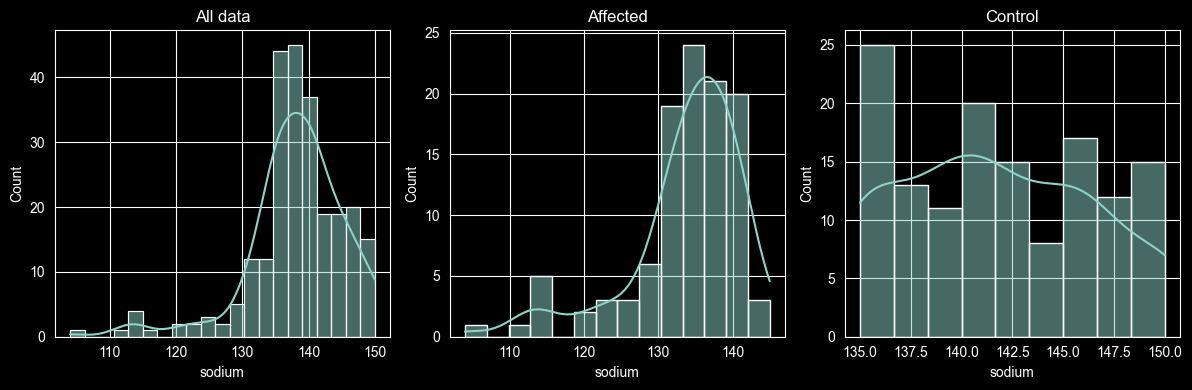

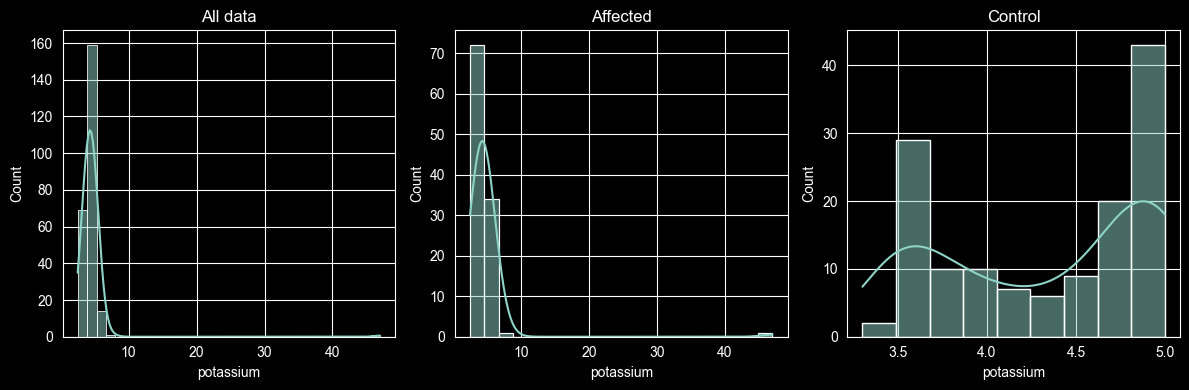

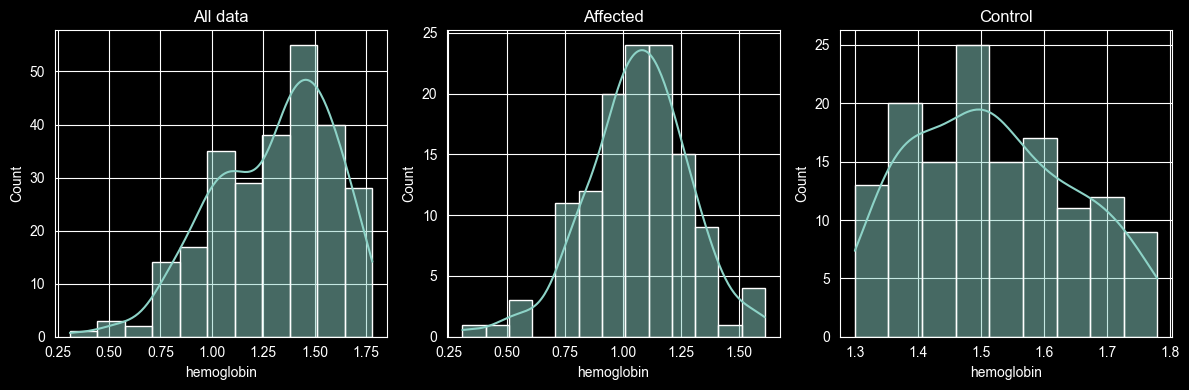

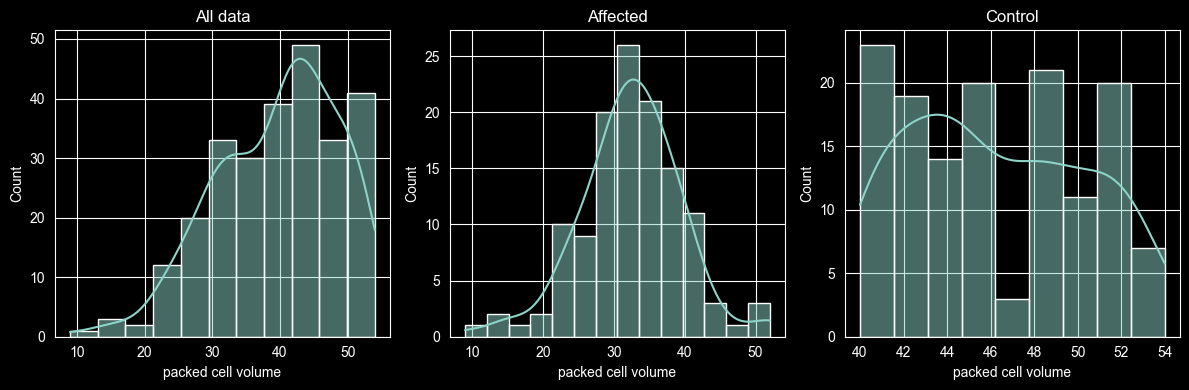

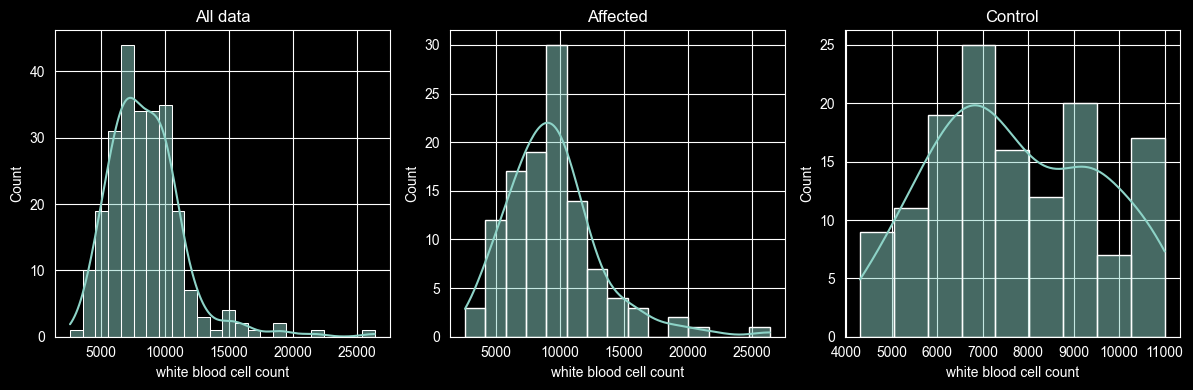

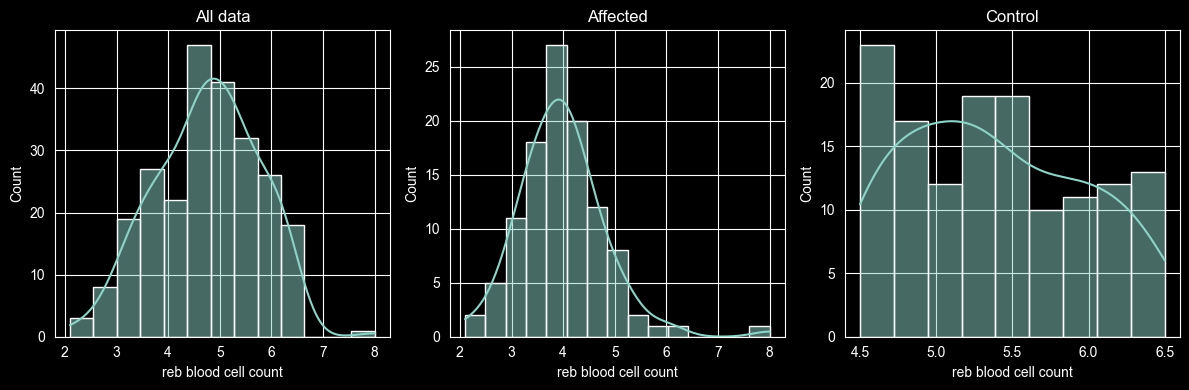

In [45]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])
numeric_affecteddata = affecteddata.select_dtypes(include=[np.number])
numeric_controldata = controldata.select_dtypes(include=[np.number])

# Dictionary of dataframes
dataframes = {
    "All data": numeric_data,
    "Affected": numeric_affecteddata,
    "Control": numeric_controldata
}

# Use numeric columns only and loop through each column
for column in numeric_data.columns:
    # Create a figure with 3 subplots in a single row
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # dataframes.items() gives us name and dataframe pairs (name, df) and using enumerate we can also get the index (i) of the loop
    for i, (name, df) in enumerate(dataframes.items()):
        # Plot a histogram of the current column from the current dataframe
        # ax=axes[i] sends the plot to the correct subplot
        sns.histplot(df[column], kde=True, ax=axes[i])
        # Set the subplot title to the dataframe's name
        axes[i].set_title(name)
        # Label the x-axis with the column name
        axes[i].set_xlabel(column)

    plt.tight_layout()
    plt.show()


- To create a correlation matrix, we make sure that we create a new dataframe which excludes all null values. Then we include only values which are "float" type.
- Then we create a new dataframe which uses the previously made "data_filtered" and use .corr() to create a correlation dataframe.
- Using pylot we create a visualisation of the correlation matrix, using the previously created data with some settings like "coolwarm" map, no interpolation, includes a colorbar on the right.

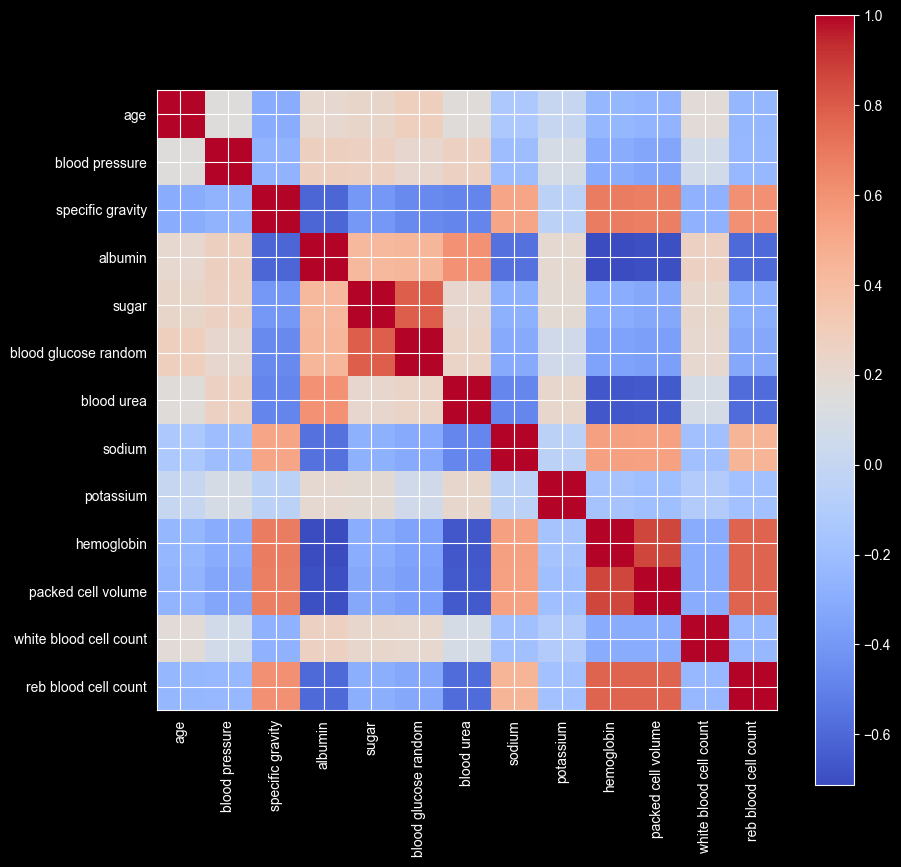

In [46]:
data_filtered = data.dropna()
data_filtered = data_filtered.loc[:, data_filtered.dtypes == float]

corr = data_filtered.corr()

plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.index)
plt.show()